In [1]:
import pandas as pd
import os
import string
import pickle
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

filtered_df=pd.read_pickle('filtered_df.pkl')
filtered_df_metadata=pd.read_pickle('filtered_df_metadata.pkl')

def preprocess_text(text):
    text=str(text)
    # Lowercase the text
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Remove punctuations
    tokens = [token for token in tokens if token not in string.punctuation]

    # Remove blank space tokens
    tokens = [token for token in tokens if token.isalnum()]

    
    # Perform lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return lemmatized_tokens

preprocessed=[]
for x in range(len(filtered_df)):
    preprocessed.append(preprocess_text(filtered_df.iloc[x]['reviewText']))


In [9]:
print(filtered_df.iloc[0]['reviewText'])
print(preprocessed[0])

Works much better than the webbing for me -- I should have bought this earlier!
['work', 'much', 'better', 'webbing', 'bought', 'earlier']


In [11]:
with open('ratings.pkl', 'rb') as f:
    ratings = pickle.load(f)
good_words=""
bad_words=""
for x in range(len(ratings)):
    if ratings[x]>=3:
        good_words+=" ".join(preprocessed[x])
    else:
        bad_words+=" ".join(preprocessed[x])

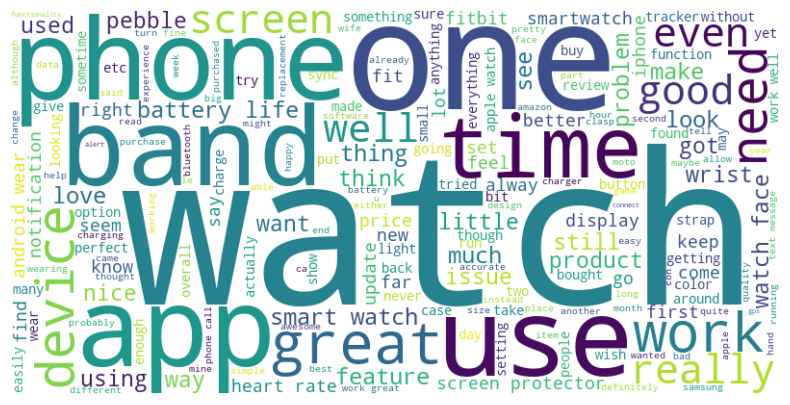

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


text = good_words


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

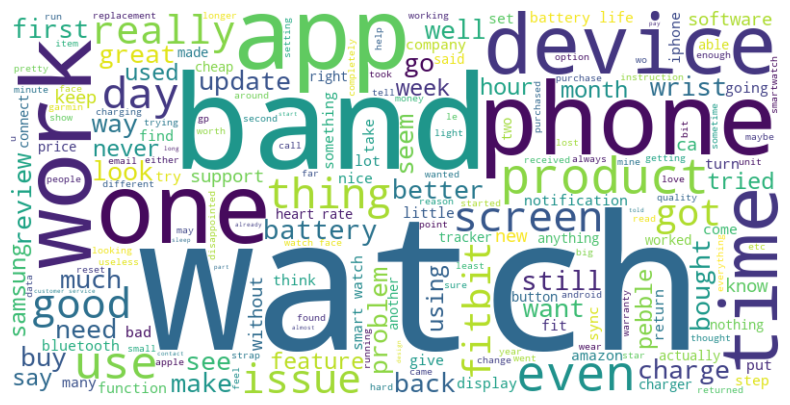

In [18]:

text = bad_words


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(preprocessed,ratings,test_size=0.25,random_state=42)

In [21]:
print(x_train[0])

['ok', 'used', 'band', 'le', '24', 'hour', 'love', 'understand', 'complaint', 'bulky', 'like', 'watch', 'yeah', 'quite', 'bit', 'bulkier', 'fitbit', 'charge', 'hr', 'much', 'good', 'beautiful', 'hd', 'color', 'display', 'syncs', 'easily', 'phone', 'lg', 'g3', 'love', 'tile', 'feature', 'allows', 'customization', 'band', 'weather', 'uv', 'sport', 'finance', 'along', 'fitness', 'apps', 'easy', 'charge', 'unlike', 'fitbit', 'remove', 'part', 'charge', 'like', 'old', 'fitbit', 'flex', 'music', 'control', 'work', 'great', 'integration', 'phone', 'call', 'notification', 'text', 'email', 'phone', 'notification', 'work', 'great', 'bad', 'battery', 'life', 'opened', 'box', 'late', 'last', 'night', 'dead', 'granted', 'normally', 'use', 'much', 'day2', 'day', 'new', 'toy', 'effect', 'regardless', 'noted', 'expecting', 'day', 'going', 'disappointed', 'seems', 'like', '2', 'top', 'hr', 'worked', 'also', 'sat', 'sedentary', 'multiple', 'occasion', 'watched', 'hr', 'monitor', 'appears', 'totally', 'r

In [ ]:
with open('preprocessed.pkl','wb')as f:
    pickle.dump(preprocessed,f)